In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# This is my path
path = "/Users/richietownsend/Nashville Software School/NSS_Data_Analytics/Capstone/bike_share/data/Minneapolis/"

# to store files in a list
list = []
 
# dirs=directories
for (root, dirs, file) in os.walk(path):
    for f in file:
        if '.csv' in f:
            print('pd.read_csv(\'../data/Minneapolis/'+f+'\')')

pd.read_csv('../data/Minneapolis/202010-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202105-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202006-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202004-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201908-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/2001906-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201910-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202008-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201904-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202104-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202007-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202011-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201909-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/202005-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201907-niceride-tripdata.csv')
pd.read_csv('../data/Minneapolis/201911

Load data

In [3]:
niceride0419 = pd.read_csv('../data/Minneapolis/201904-niceride-tripdata.csv')
niceride0519 = pd.read_csv('../data/Minneapolis/201905-niceride-tripdata.csv')
niceride0619 = pd.read_csv('../data/Minneapolis/202006-niceride-tripdata.csv')
niceride0719 = pd.read_csv('../data/Minneapolis/201907-niceride-tripdata.csv')
niceride0819 = pd.read_csv('../data/Minneapolis/201908-niceride-tripdata.csv')
niceride0919 = pd.read_csv('../data/Minneapolis/201909-niceride-tripdata.csv')
niceride1019 = pd.read_csv('../data/Minneapolis/201910-niceride-tripdata.csv')
niceride1119 = pd.read_csv('../data/Minneapolis/201911-niceride-tripdata.csv')
niceride0420 = pd.read_csv('../data/Minneapolis/202004-niceride-tripdata.csv')
niceride0520 = pd.read_csv('../data/Minneapolis/202005-niceride-tripdata.csv')
niceride0620 = pd.read_csv('../data/Minneapolis/2001906-niceride-tripdata.csv')
niceride0720 = pd.read_csv('../data/Minneapolis/202007-niceride-tripdata.csv')
niceride0820 = pd.read_csv('../data/Minneapolis/202008-niceride-tripdata.csv')
niceride0920 = pd.read_csv('../data/Minneapolis/202009-niceride-tripdata.csv')
niceride1020 = pd.read_csv('../data/Minneapolis/202010-niceride-tripdata.csv')
niceride1120 = pd.read_csv('../data/Minneapolis/202011-niceride-tripdata.csv')
niceride0421 = pd.read_csv('../data/Minneapolis/202104-niceride-tripdata.csv')
niceride0521 = pd.read_csv('../data/Minneapolis/202105-niceride-tripdata.csv')

In [4]:
niceride1119.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             9191 non-null   int64  
 1   start_time               9191 non-null   object 
 2   end_time                 9191 non-null   object 
 3   start station id         4807 non-null   float64
 4   start station name       4807 non-null   object 
 5   start station latitude   9191 non-null   float64
 6   start station longitude  9191 non-null   float64
 7   end station id           4807 non-null   float64
 8   end station name         4807 non-null   object 
 9   end station latitude     9191 non-null   float64
 10  end station longitude    9191 non-null   float64
 11  bikeid                   9191 non-null   int64  
 12  usertype                 9191 non-null   object 
 13  birth year               9191 non-null   int64  
 14  gender                  

In [5]:
niceride_all = pd.concat([niceride0419, niceride0519, niceride0619, niceride0719, niceride0819, niceride0919, niceride1019, niceride1119])

In [6]:
niceride_all2 = pd.concat([niceride0420, niceride0520, niceride0620, niceride0720, niceride0820, niceride0920, niceride1020, niceride1120, niceride0421, niceride0521])

In [7]:
niceride_all2 = niceride_all2[['ride_id', 'started_at', 'ended_at', 'start_station_id', 'end_station_id']]

In [8]:
niceride_all = niceride_all[['bikeid', 'start_time', 'end_time', 'start station id', 'end station id']]
niceride_all.rename(columns={'bikeid':'ride_id', 'start_time':'started_at', 'end_time':'ended_at', 'start station id':'start_station_id', 'end station id': 'end_station_id'}, inplace=True)

In [9]:
all_niceride = pd.concat([niceride_all, niceride_all2])

In [10]:
all_niceride['started_at'] = pd.to_datetime(all_niceride['started_at'], format='%Y-%m-%d')
all_niceride['ended_at'] = pd.to_datetime(all_niceride['ended_at'], format='%Y-%m-%d')

In [11]:
all_niceride['duration'] = all_niceride['ended_at'] - all_niceride['started_at']

In [12]:
all_niceride = all_niceride.dropna(subset=['start_station_id'])
all_niceride = all_niceride.dropna(subset=['end_station_id'])
all_niceride = all_niceride[~((all_niceride['start_station_id'] == all_niceride['end_station_id']) & (all_niceride['duration'] < '00:05:00'))]

In [13]:
all_niceride['start_date'] = all_niceride['started_at'].dt.date

In [14]:
niceride_by_date = all_niceride.groupby('start_date').agg({'started_at':'count'}).reset_index()
niceride_by_date.rename(columns={'start_date':'ride_date', 'started_at':'ride_count'}, inplace = True)

# citi_by_date = all_citi.groupby(['start_date'])['bikeid'].count()
# citi_by_date = pd.DataFrame(citi_by_date).reset_index()

In [15]:
niceride_by_date['ride_date'] = pd.to_datetime(niceride_by_date['ride_date'], format='%Y-%m-%d')

In [16]:
niceride_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ride_date   418 non-null    datetime64[ns]
 1   ride_count  418 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.7 KB


In [17]:
niceride_by_date['month'] = niceride_by_date['ride_date'].dt.month
niceride_by_date['year'] = niceride_by_date['ride_date'].dt.year
niceride_by_date['m_y'] = niceride_by_date['month'].apply(str) + '-' + niceride_by_date['year'].apply(str) 

In [18]:
niceride_by_date.groupby(['year', 'month']).agg({'ride_count':'sum'})

ride_count
year month            
2019 4            7732
     5           40125
     7           50307
     8           50648
     9           37646
     10          20648
     11           4770
2020 4           11965
     5           24881
     7           32655
     8           27764
     9           18533
     10           9969
     11           1063
2021 4            7983
     5           21630

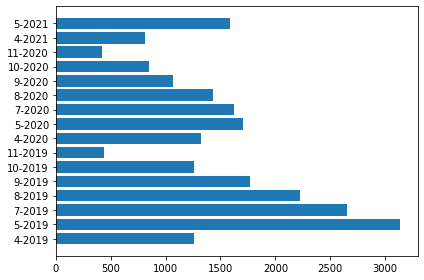

In [19]:
plt.barh('m_y', 'ride_count', data=niceride_by_date)
plt.tight_layout()

In [20]:
niceride_by_date.to_csv('niceride_by_date.csv')

In [21]:
niceride_by_date.groupby('m_y').agg({'ride_count':'sum'})

,ride_count
m_y,
10-2019,20648
10-2020,9969
11-2019,4770
11-2020,1063
4-2019,7732
4-2020,11965
4-2021,7983
5-2019,40125
5-2020,24881
